
<img src="../images/5thNRST_logo.png" alt="NOWPAP" width="900" height="700">

## NOWPAP REMOTE SENSING TRAINING COURSE   
#### Webinar 2: Monitoring and Assessment of Water Quality by Ocean Color Remote Sensing
<span style="color:brown; font-size:1.1em;font-style:italic"> Time series analysis: animations from monthly images</span>

<hr style="border:2px solid rgb(30,70,125)"> </hr>

<span style="font-family:Helvieta; font-size:2em;">Eligio Maure (maure@npec.or.jp)</span>

***
**Note 1**: Execute each cell through the <button class="btn btn-default btn-xs"><i class="icon-play fa fa-play"></i></button> button from the top MENU (or keyboard shortcut `Shift` + `Enter`).<br>
<br>
**Note 2**: If, for any reason, the kernel is not working anymore, in the top MENU, click on the <button class="btn btn-default btn-xs"><i class="fa fa-repeat icon-repeat"></i></button> button. Then, in the top MENU, click on "Cell" and select "Run All Above Selected Cell".<br>
***

# Table of contents
- [1. Purpose](#1.-Purpose)
- [2. Library import](#2.-Library-import)
- [3. Define parameters](#3.-Define-parameters)
- [4. Animation helper functions](#4.-Animation-helper-functions)
- [5. Create the animation](#5.-Create-the-animation)
- [6. Resources](#6.-Resources)
***

# 1. Purpose
[Return to the "Table of contents"](#Table-of-contents)

The objective of this exercise is to create animations from a series of satellite images.  
The images used are obtained from the [Marine Environmental Watch](https://ocean.nowpap3.go.jp/?page_id=862) of Northwest Pacific Action Plan (NOWPAP).

You will learn how to use [matplotlib](https://matplotlib.org/) to create animations.
***

# 2. Library import
[Return to the "Table of contents"](#Table-of-contents)

In [1]:
# Data manipulation
import numpy as np

# Library import
from netCDF4 import Dataset, num2date

# System
import sys
from pathlib import Path

# Visualization
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import rc, colors
from IPython.display import HTML
from PIL import Image

# %matplotlib inline
%matplotlib notebook

In [2]:
sys.path.append(str(Path('.').absolute().parent)) 
import sutils as util
# util.mpl_custom(mpl=plt)

# 3. Define parameters
[Return to the "Table of contents"](#Table-of-contents)

In [3]:
VAR = 'chlor_a'    # variable name 

INTPUT_DIR = Path('.').absolute().joinpath(r'data\SGLI\month')
OUTPUT_DIR = Path('.').absolute().joinpath(r'data\SGLI\animation')
if not OUTPUT_DIR.is_dir():
    OUTPUT_DIR.mkdir(parents=True)

INPUT_FILES = INTPUT_DIR.glob('*.png')

I want you to use "2.1.time-series-analysis_data-download.ipynb" to download SGLI monthly images

Define the following params
- SY, EY = 2020, 2020
- SM, EM = 1, 12

# 4. Animation helper functions
[Return to the "Table of contents"](#Table-of-contents)
- One helper function loads PNG images
- One helper function to read and store all images

In [4]:
def img_reader(filename):
    return Image.open(filename)

In [5]:
def image_loader(image_list):
    # start with empty list to store images
    images = []
    append = images.append
    for f in image_list:
        append(img_reader(filename=f))
    return images

# 5. Create the animation
[Return to the "Table of contents"](#Table-of-contents)

In [6]:
filename = OUTPUT_DIR.joinpath('GS2020_CHL_TB_month.gif')

images = image_loader(image_list=INPUT_FILES)
# create the gif file based on appended images
images[0].save(filename,
               save_all=True,
               dpi=300,
               append_images=images[1:],
               duration=100,
               loop=0)

print('Done!')

Done!


- We can also use netCDF files but the process is more complex

In [8]:
def init_func():
    return [mesh]

In [9]:
def update_func(i):
    """updates components by fixed increments/GS202001_CHL_TB_month.nc"""
    # print(f'{i}: {input_files[i]}')
    chl = util.nc_reader(file=input_files[i], var='chlor_a')
    mesh = [ax.pcolormesh(lon, lat, chl, cmap='jet', norm=norm)]
    t = util.nc_reader(file=input_files[i], var='time')[0].strftime('%b %Y')
    ax.set_title(f'time: {t}')
    return [mesh]

<IPython.core.display.Javascript object>


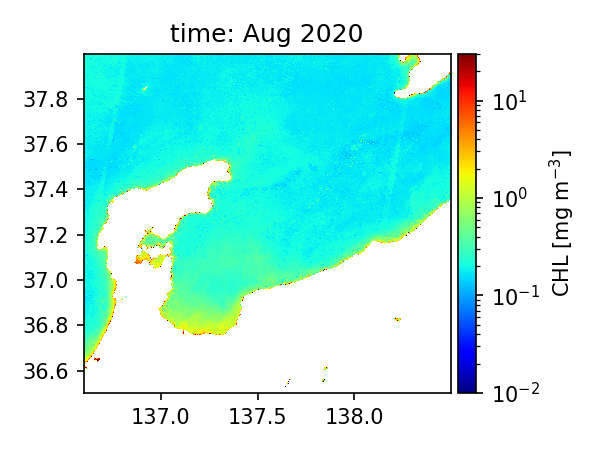

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(4, 3), dpi=150)

input_files = list(INTPUT_DIR.glob('*.nc'))

# load data
lat = util.nc_reader(file=input_files[0], var='lat')
lon = util.nc_reader(file=input_files[0], var='lon')
chl = util.nc_reader(file=input_files[0], var='chlor_a')
t = util.nc_reader(file=input_files[0], var='time')[0].strftime('%b %Y')

# norm and pcolormesh
norm = colors.LogNorm(vmin=0.01, vmax=30)
mesh = [ax.pcolormesh(lon, lat, chl, cmap='jet', norm=norm)]

# TIME LEGEND
ax.set_title(f'time: {t}')

# COLORBAR
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
cb = plt.colorbar(mesh[0], cax=cax)
cb.set_label('CHL [mg m$^{-3}$]')

# blit=True: re-draw what has changed
# interval: Delay between frames in milliseconds.
anim = animation.FuncAnimation(fig, update_func, 
                               init_func=init_func,
                               frames=12,
                               interval=100, blit=True, repeat=True)
fig.tight_layout()
# plt.show()

anim.save(OUTPUT_DIR.joinpath("GS2020_CHL_TB_month-2.gif"))

- Show animation using IPython notebook display HTML class.

In [11]:
HTML(anim.to_html5_video())

<div class="alert alert-block alert-success"/div>
    <b>Done!</b><br>
  
--- 

#### And thank you for your attention! :) 
    Now try the same exercise with other years or sensors, etc.
    We hope you enjoyed the training provided by NOWPAP CEARAC.

# 6. Resources
[Go back to the "Table of contents"](#Table-of-contents)
1. https://matplotlib.org/stable/api/animation_api.html
2. https://matplotlib.org/stable/api/_as_gen/matplotlib.animation.FuncAnimation.html
3. https://jakevdp.github.io/blog/2012/08/18/matplotlib-animation-tutorial/
4. https://ipython.readthedocs.io/en/stable/api/generated/IPython.display.html#classes
5. https://pillow.readthedocs.io/en/stable/
6. https://unidata.github.io/netcdf4-python/
7. https://ocean.nowpap3.go.jp/?page_id=862
8. https://github.com/npec/5th-NOWPAP-Training-Course-on-Remote-Sensing-Data-Analysis